# 🌾 Agri commodity Min,Max,Modal Price Data

### Dataset Link - https://www.kaggle.com/datasets/syedjaferk/agriculture-commodity-data-2019

In [1]:
# Importing libraries as necessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data
df=pd.read_csv('D:\\Data Science\\Datasets\\EDA\\agridata_csv_202110311352.csv')

In [3]:
df.head(2)

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22


In [4]:
df.shape

(836977, 8)

In [5]:
# Droping the na values since it is only two rows
df.dropna(inplace=True)

In [6]:
# Droping the duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(836855, 8)

In [8]:
# Seeing the info for getting the Data type for date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836855 entries, 0 to 836976
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   commodity_name  836855 non-null  object 
 1   state           836855 non-null  object 
 2   district        836855 non-null  object 
 3   market          836855 non-null  object 
 4   min_price       836855 non-null  float64
 5   max_price       836855 non-null  float64
 6   modal_price     836855 non-null  float64
 7   date            836855 non-null  object 
dtypes: float64(3), object(5)
memory usage: 57.5+ MB


In [9]:
df['date'].head()

0    2019-05-22
1    2019-05-22
2    2019-05-22
3    2019-05-22
4    2019-05-22
Name: date, dtype: object

In [10]:
df['date'].tail()

836972    06 Oct 2021
836973    06 Oct 2021
836974    06 Oct 2021
836975    06 Oct 2021
836976    06 Oct 2021
Name: date, dtype: object

In [11]:
# Converting the Date from String object to Datetime series
pd.to_datetime(df['date'], format = '%Y-%m-%d')
# Faced issues due to multiple date format

ValueError: time data "27 Oct 2021" at position 341 doesn't match format specified

In [12]:
# Locating the values for date with string object
df.loc[(df['date'] == '27 Oct 2021')].value_counts()

commodity_name               state              district   market         min_price  max_price  modal_price  date       
Ajwan                        Gujarat            Amreli     Amreli         6000.0     8750.0     6900.0       27 Oct 2021    1
Apple                        Uttar Pradesh      Lakhimpur  Paliakala      7130.0     7230.0     7180.0       27 Oct 2021    1
                                                Mirzapur   Mirzapur       6550.0     6650.0     6600.0       27 Oct 2021    1
                                                           Ahirora        6500.0     6700.0     6600.0       27 Oct 2021    1
                                                Meerut     Meerut         5220.0     5700.0     5460.0       27 Oct 2021    1
                                                                                                                           ..
                             Jammu and Kashmir  Pulwama    Pulwama (F&V)  6250.0     5625.0     0.0          27 Oct 2021   

In [13]:
# Noted down some index for checking the proper formatting of date
df.loc[[475482,475482,827200,836976,240473,733902],['date']]

,date
475482,2019-12-10
475482,2019-12-10
827200,11 Oct 2021
836976,06 Oct 2021
240473,2019-08-14
733902,2021-05-07


In [14]:
# Imported the parser for formatting YYYY-MM-DD

from dateutil import parser

def parse_date(date_str):
    try:
        parsed_date = parser.parse(date_str)
        return parsed_date.strftime('%Y-%m-%d')
    except:
        return None

df['date'] = df['date'].apply(parse_date)

In [15]:
# Ensured the format correctly
df.loc[[475482,475482,827200,836976,240473,733902],['date']]

,date
475482,2019-12-10
475482,2019-12-10
827200,2021-10-11
836976,2021-10-06
240473,2019-08-14
733902,2021-05-07


In [16]:
# Checking the null values for date
df['date'].isnull().sum()

0

In [17]:
#Converting the string object to Date time series
df['date']=pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [18]:
# checking the null again for ensuring there is no null velues
df['date'].isnull().sum()

0

In [19]:
df.shape

(836855, 8)

In [20]:
# Checking the day using the date time series for proper implementation 
df.loc[0,'date'].day_name()

'Wednesday'

In [21]:
# sorting the dates as ascending order
df.sort_values(by='date')
# Here we found that some extreme values for apples which is may not happen at all

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
5407,Papaya,Punjab,Ferozpur,Mamdot,23.00,24.00,23.50,2019-05-22
5406,Papaya,Punjab,Sangrur,Lehra Gaga,30.00,30.00,30.00,2019-05-22
5405,Papaya,Punjab,Ludhiana,Jagraon,20.00,23.00,22.00,2019-05-22
5404,Papaya,Punjab,Gurdaspur,Gurdaspur,18.00,23.00,20.00,2019-05-22
...,...,...,...,...,...,...,...,...
836116,Arhar (Tur/Red Gram)(Whole),Uttar Pradesh,Kanpur,Pukhrayan,6200.00,6400.00,6330.00,2021-10-30
836115,Arhar (Tur/Red Gram)(Whole),Uttar Pradesh,Hamirpur,Muskara,6180.00,6300.00,6230.00,2021-10-30
836114,Arhar (Tur/Red Gram)(Whole),Uttar Pradesh,Mirzapur,Mirzapur,6300.00,6454.00,6345.00,2021-10-30
833573,Apple,Jammu and Kashmir,Pulwama,Pulwama (F&V),6250.00,5625.00,0.00,2021-10-30


In [22]:
# Here checking the min price for apple more than 1000
df.loc[(df['commodity_name']=="Apple") & (df['min_price']>1000)]
# Found a lot of data with more than 1000, which may not happen at all
# I believe that there is a issue with unit conversion, since we dont know the conversion formula we cant do it
# Looking for other methods for exploration

,commodity_name,state,district,market,min_price,max_price,modal_price,date
828085,Apple,Chattisgarh,Durg,Durg,8000.0,9000.0,8500.0,2021-10-15
828086,Apple,Chattisgarh,Rajnandgaon,Rajnandgaon,7000.0,7000.0,7000.0,2021-10-15
828087,Apple,Goa,North Goa,Mapusa,3500.0,3500.0,3500.0,2021-10-15
828088,Apple,Haryana,Ambala,Barara,6000.0,6990.0,6000.0,2021-10-15
828089,Apple,Haryana,Kaithal,Dhand,3000.0,5000.0,4500.0,2021-10-15
...,...,...,...,...,...,...,...,...
834491,Apple,Uttrakhand,Haridwar,Roorkee,1500.0,3500.0,2800.0,2021-10-12
834492,Apple,Uttrakhand,UdhamSinghNagar,Rudrapur,2000.0,4000.0,3000.0,2021-10-12
834493,Apple,West Bengal,Kolkata,Mechua,7200.0,9400.0,8500.0,2021-10-12
834494,Apple,West Bengal,Kolkata,Mechua,8300.0,7400.0,0.0,2021-10-12


In [23]:
df.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22


In [24]:
df['date'].head()

0   2019-05-22
1   2019-05-22
2   2019-05-22
3   2019-05-22
4   2019-05-22
Name: date, dtype: datetime64[ns]

In [25]:
df['date'].tail()

836972   2021-10-06
836973   2021-10-06
836974   2021-10-06
836975   2021-10-06
836976   2021-10-06
Name: date, dtype: datetime64[ns]

In [26]:
# Here this commodity price is well noted
df.loc[(df['commodity_name']=="Ajwan") & (df['min_price']<600)]

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22
...,...,...,...,...,...,...,...,...
816380,Ajwan,Gujarat,Mehsana,Unjha,50.00,130.60,101.00,2021-07-29
819266,Ajwan,Andhra Pradesh,Kurnool,Kurnool,41.60,207.99,124.12,2021-07-16
819267,Ajwan,Gujarat,Amreli,Amreli,76.50,98.75,79.50,2021-07-16
819268,Ajwan,Gujarat,Mehsana,Unjha,47.50,120.10,100.50,2021-07-16


In [27]:
# Checking the min price of all commodities more than ₹1000
df.loc[df['min_price'] > 1000]
# found many as that but it may not correct always

,commodity_name,state,district,market,min_price,max_price,modal_price,date
1819,Cardamoms,Kerala,Idukki,Thodupuzha,2000.0,2500.0,2100.0,2019-05-22
1820,Cardamoms,Maharashtra,Mumbai,Mumbai,2500.0,3000.0,2800.0,2019-05-22
24799,Fish,Odisha,Angul,Pallahara,1100.0,1300.0,1200.0,2019-05-26
31433,Cardamoms,Kerala,Idukki,Kattappana,2000.0,2650.0,2400.0,2019-05-28
38642,Cardamoms,Kerala,Idukki,Thodupuzha,1900.0,2300.0,2000.0,2019-06-10
...,...,...,...,...,...,...,...,...
836972,Arhar (Tur/Red Gram)(Whole),Gujarat,Bharuch,Jambusar(Kaavi),5100.0,5500.0,5300.0,2021-10-06
836973,Arhar (Tur/Red Gram)(Whole),Gujarat,Rajkot,Jasdan,3500.0,5500.0,5000.0,2021-10-06
836974,Arhar (Tur/Red Gram)(Whole),Gujarat,Rajkot,Rajkot,5300.0,6225.0,5650.0,2021-10-06
836975,Arhar (Tur/Red Gram)(Whole),Gujarat,Junagarh,Visavadar,4750.0,5750.0,5250.0,2021-10-06


In [28]:
df['commodity_name'].value_counts()

Onion            44908
Tomato           42714
Wheat            41172
Potato           37808
Brinjal          33686
                 ...  
Butter               3
Lukad                2
Siddota              1
Sunhemp              1
Almond(Badam)        1
Name: commodity_name, Length: 248, dtype: int64

In [29]:
# Checking the Top 25 commodities to proceed with
df['commodity_name'].value_counts().head(25)

Onion                  44908
Tomato                 42714
Wheat                  41172
Potato                 37808
Brinjal                33686
Green+Chilli           33003
Apple                  29933
Cauliflower            23578
Bottle+gourd           22445
Mustard                21350
Cucumbar(Kheera)       20414
Maize                  18563
Pumpkin                18297
Cabbage                18055
Bitter+gourd           17812
Ginger(Green)          16976
Paddy(Dhan)(Common)    15924
Soyabean               15917
Garlic                 13704
Banana                 13646
Lemon                  13485
Rice                   13300
Raddish                13281
Gur(Jaggery)           13258
Pomegranate            13209
Name: commodity_name, dtype: int64

In [30]:
# Checking commodities data for each states
df['state'].value_counts()

Uttar Pradesh          343117
Maharashtra             67357
Punjab                  67037
Gujarat                 60993
Kerala                  51492
Madhya Pradesh          39212
Himachal Pradesh        28425
Karnataka               26979
Rajasthan               25999
Haryana                 25773
West Bengal             21664
Uttrakhand              13976
Odisha                  13104
Tamil Nadu              11309
Tripura                 10018
Telangana                8040
Jammu and Kashmir        5570
Chattisgarh              4674
Andhra Pradesh           2941
Assam                    2535
NCT of Delhi             2355
Meghalaya                1865
Nagaland                  977
Manipur                   349
Pondicherry               301
Jharkhand                 300
Goa                       287
Mizoram                   173
Andaman and Nicobar        33
Name: state, dtype: int64

### Here I will consider the top 25 commodities for 3 States with almost same value counts
So i have choosed the sates from north to south for equal distribution, the states are Punjab, Maharashtra and Kerala

In [31]:
# Setting the date range from May 2019 to Oct 2021
from_date = pd.to_datetime('2019-05-22')
to_tate = pd.to_datetime('2021-10-30')

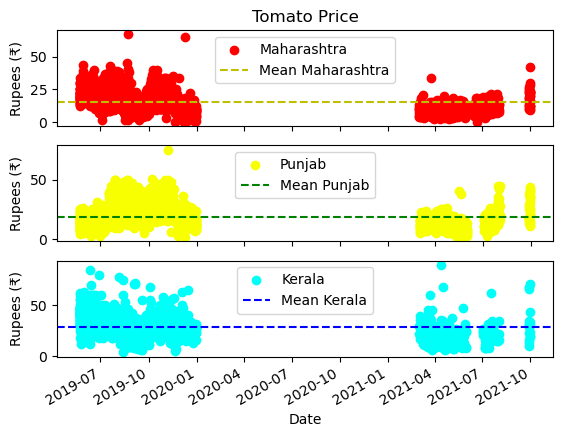

In [32]:
# Plottig the Tomoto prices for 3 States

amreli = df.loc[(df['commodity_name']=="Tomato") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Tomato") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Tomato") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Tomato Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

### Since there is a large number of missing value for more than a year, we will consider the dates from May 2019 to Jan 2021

In [33]:
# Setting the date as per the requrement
from_date = pd.to_datetime('2019-05-22')
to_tate = pd.to_datetime('2020-01-01')

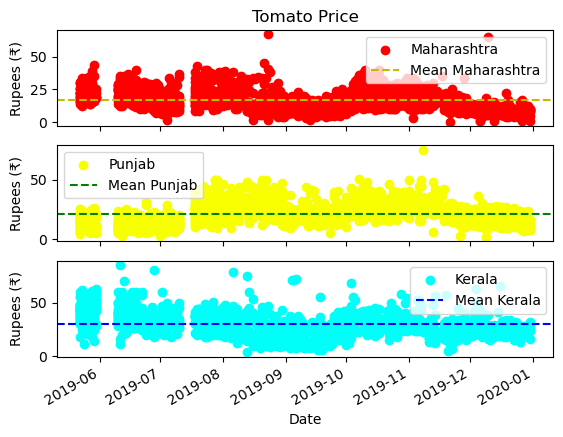

In [34]:
amreli = df.loc[(df['commodity_name']=="Tomato") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Tomato") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Tomato") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Tomato Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

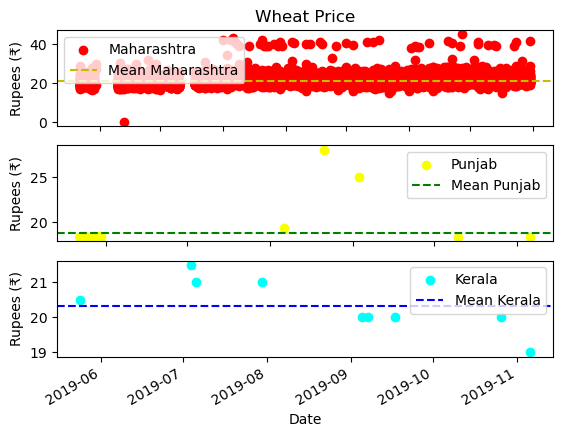

In [35]:
amreli = df.loc[(df['commodity_name']=="Wheat") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Wheat") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Wheat") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala') 

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Wheat Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

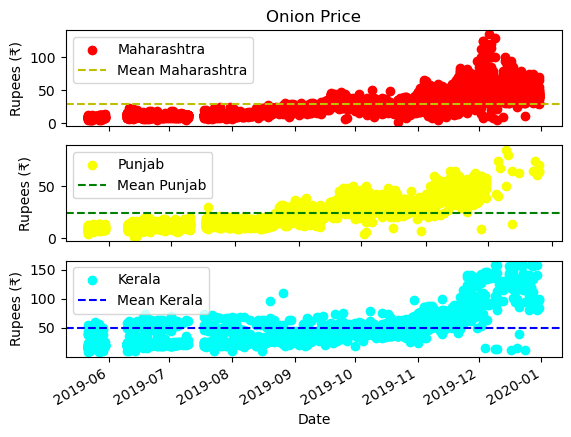

In [36]:
amreli = df.loc[(df['commodity_name']=="Onion") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Onion") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Onion") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Onion Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

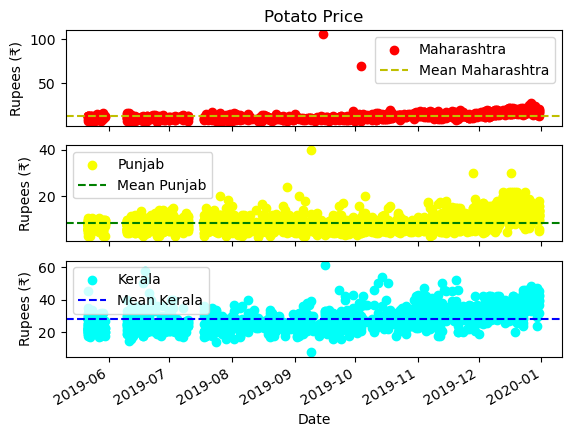

In [37]:
amreli = df.loc[(df['commodity_name']=="Potato") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Potato") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Potato") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Potato Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

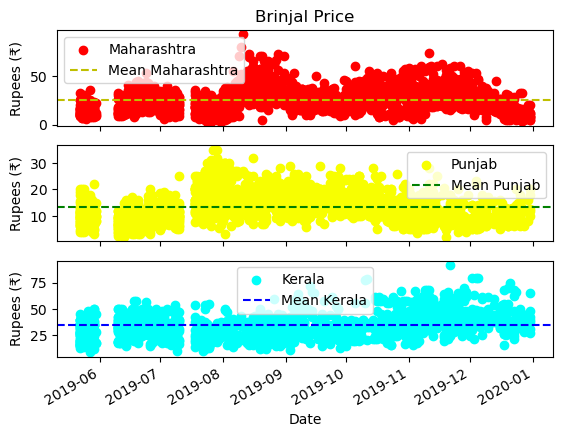

In [38]:
amreli = df.loc[(df['commodity_name']=="Brinjal") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Brinjal") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Brinjal") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Brinjal Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

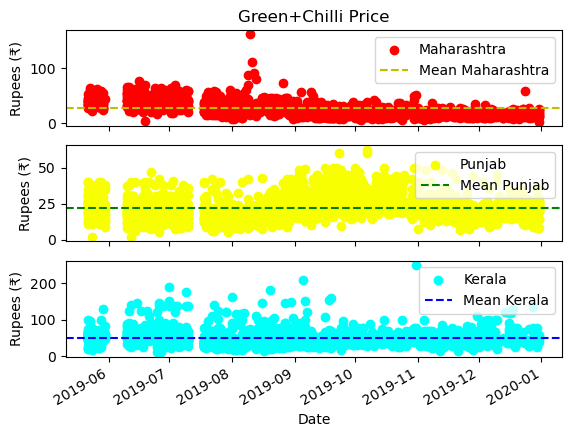

In [39]:
amreli = df.loc[(df['commodity_name']=="Green+Chilli") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Green+Chilli") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Green+Chilli") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Green+Chilli Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

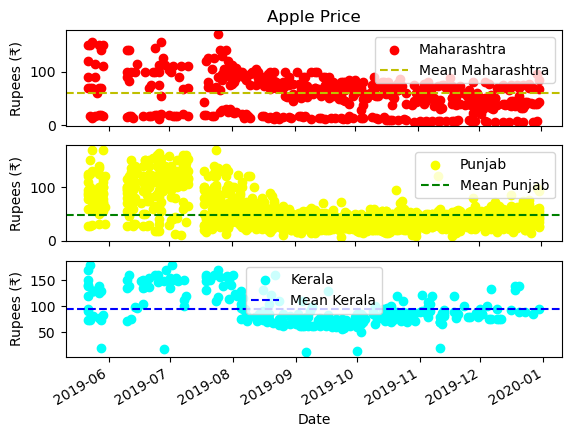

In [40]:
amreli = df.loc[(df['commodity_name']=="Apple") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Apple") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Apple") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Apple Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

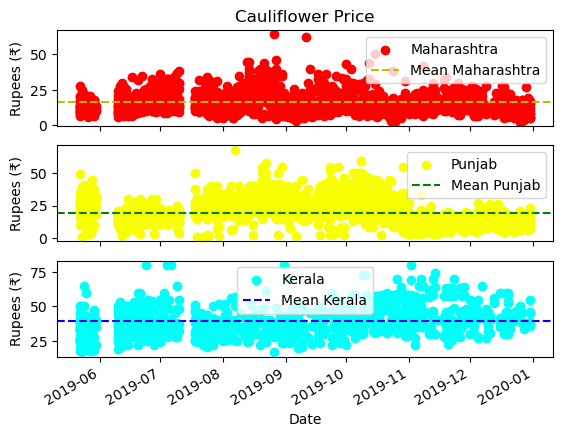

In [41]:
amreli = df.loc[(df['commodity_name']=="Cauliflower") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Cauliflower") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Cauliflower") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Cauliflower Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

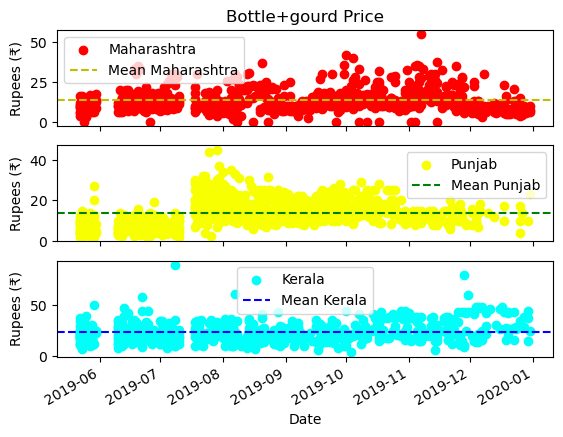

In [42]:
amreli = df.loc[(df['commodity_name']=="Bottle+gourd") & (df['state']=='Uttrakhand') ]

amreli = df.loc[(df['commodity_name']=="Bottle+gourd") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Bottle+gourd") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Bottle+gourd") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala') 

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Bottle+gourd Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

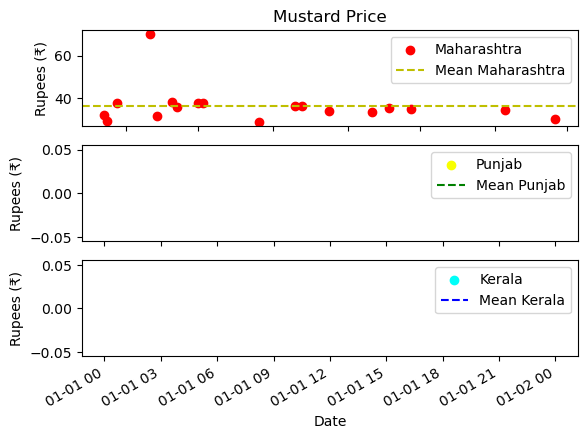

In [43]:
amreli = df.loc[(df['commodity_name']=="Mustard") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Mustard") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Mustard") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')     

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Mustard Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

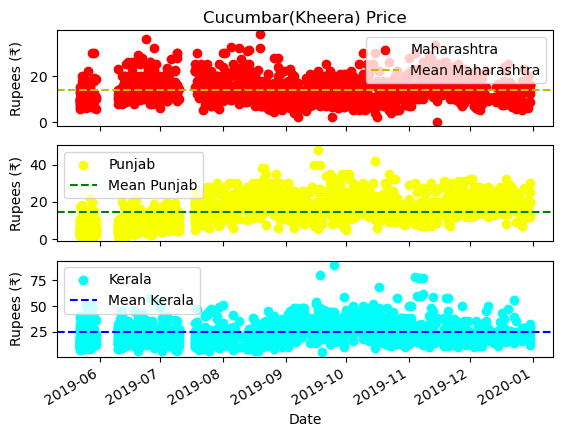

In [44]:
amreli = df.loc[(df['commodity_name']=="Cucumbar(Kheera)") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Cucumbar(Kheera)") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Cucumbar(Kheera)") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean Maharashtra')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean Punjab')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean Kerala')

ax1.legend()
ax1.set_title('Cucumbar(Kheera) Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

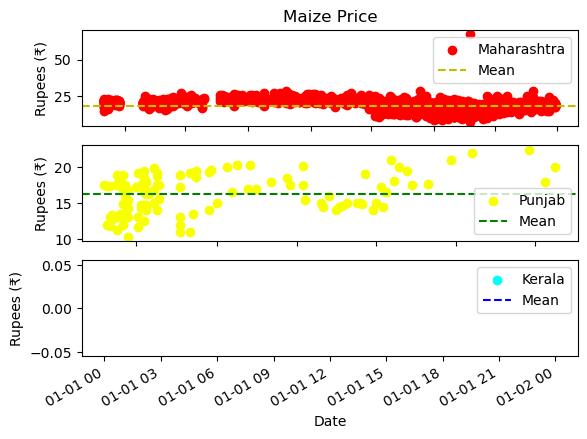

In [45]:
amreli = df.loc[(df['commodity_name']=="Maize") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Maize") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Maize") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')

ax1.legend()
ax1.set_title('Maize Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

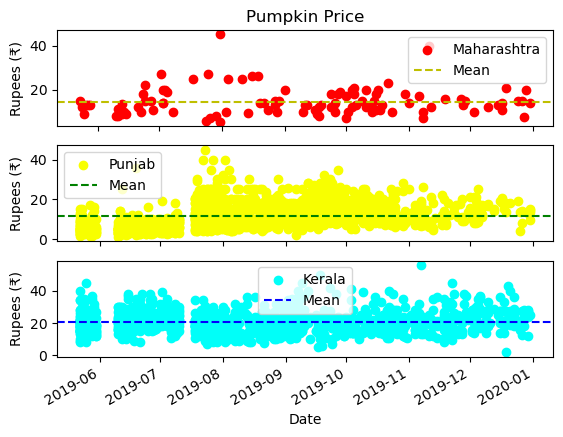

In [46]:
amreli = df.loc[(df['commodity_name']=="Pumpkin") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Pumpkin") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Pumpkin") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala') 

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Pumpkin Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

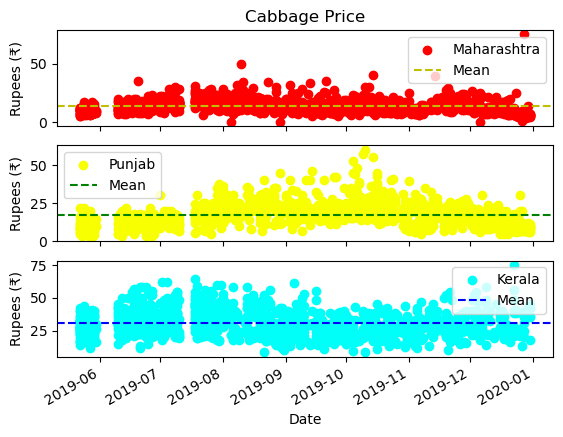

In [47]:
amreli = df.loc[(df['commodity_name']=="Cabbage") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Cabbage") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Cabbage") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Cabbage Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

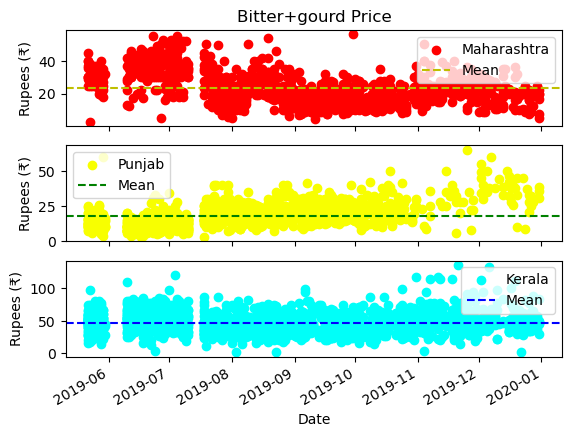

In [48]:
amreli = df.loc[(df['commodity_name']=="Bitter+gourd") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Bitter+gourd") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Bitter+gourd") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Bitter+gourd Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

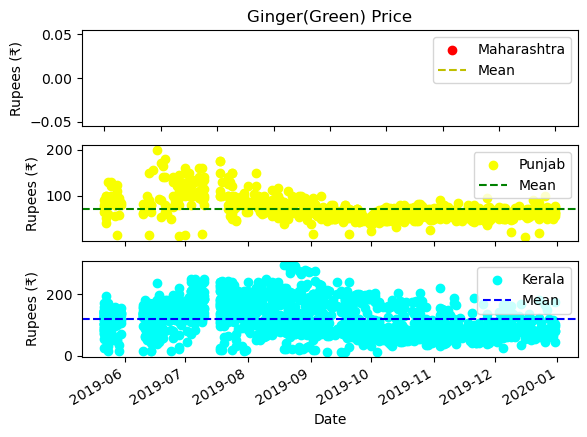

In [49]:
amreli = df.loc[(df['commodity_name']=="Ginger(Green)") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Ginger(Green)") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Ginger(Green)") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Ginger(Green) Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

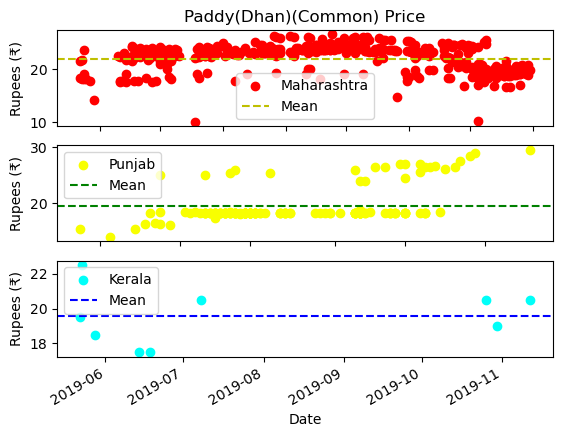

In [50]:
amreli = df.loc[(df['commodity_name']=="Paddy(Dhan)(Common)") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Paddy(Dhan)(Common)") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Paddy(Dhan)(Common)") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Paddy(Dhan)(Common) Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

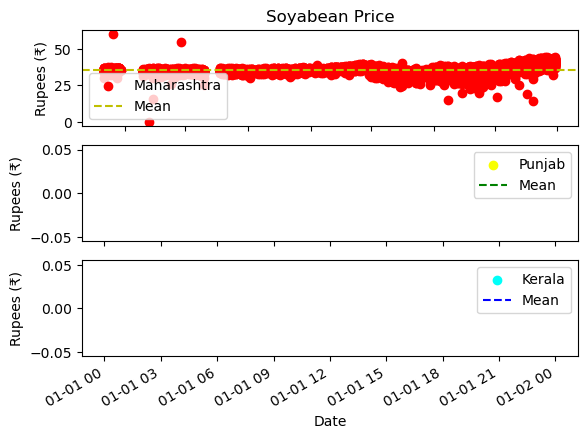

In [51]:
amreli = df.loc[(df['commodity_name']=="Soyabean") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Soyabean") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Soyabean") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Soyabean Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

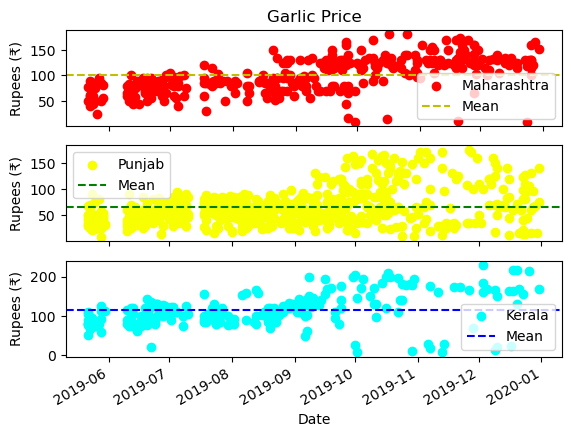

In [52]:
amreli = df.loc[(df['commodity_name']=="Garlic") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Garlic") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Garlic") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Garlic Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

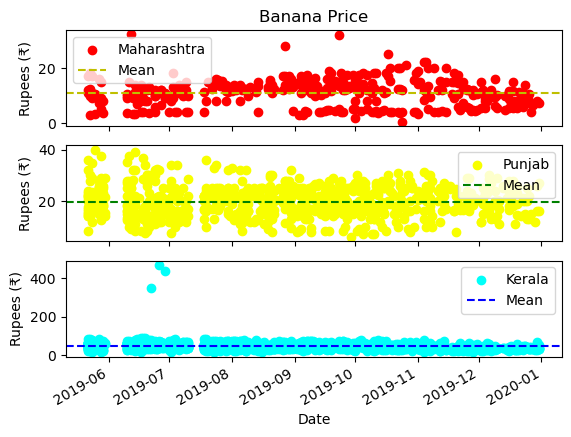

In [53]:
amreli = df.loc[(df['commodity_name']=="Banana") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Banana") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Banana") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Banana Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

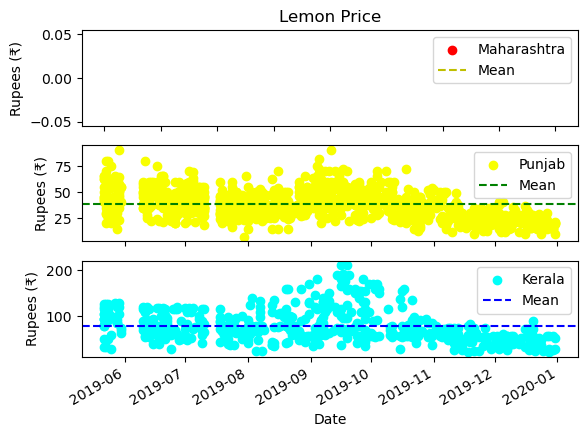

In [54]:
amreli = df.loc[(df['commodity_name']=="Lemon") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Lemon") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Lemon") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')  

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Lemon Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

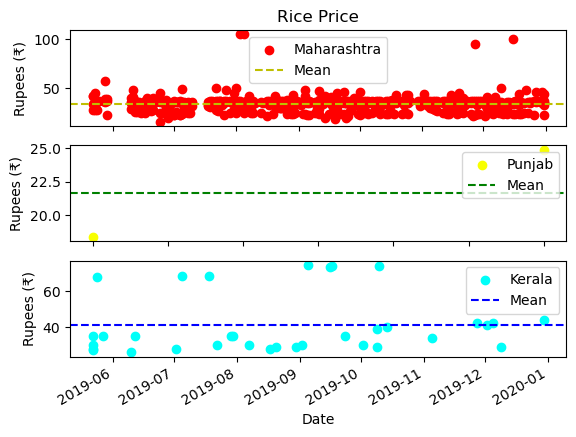

In [55]:
amreli = df.loc[(df['commodity_name']=="Rice") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Rice") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Rice") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')   

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')

ax1.legend()
ax1.set_title('Rice Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

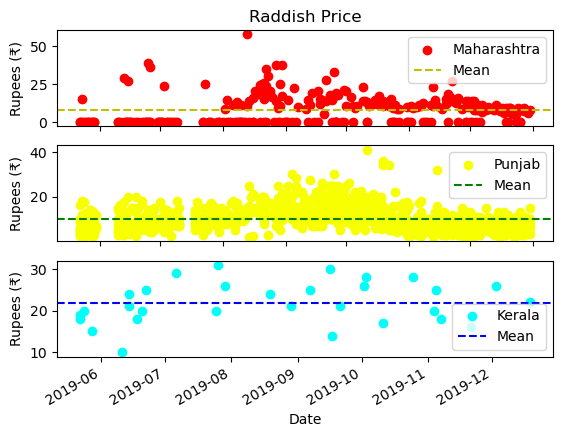

In [56]:
amreli = df.loc[(df['commodity_name']=="Raddish") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Raddish") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Raddish") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Raddish Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

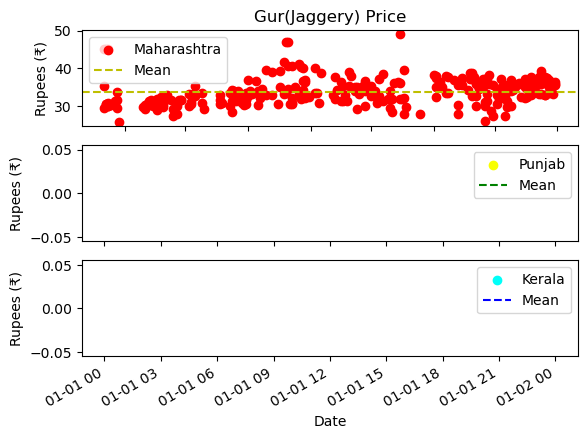

In [57]:
amreli = df.loc[(df['commodity_name']=="Gur(Jaggery)") & (df['state']=='Maharashtra') & (df['date']>=from_date) & (df['date'] < to_tate)]
Dehradoon = df.loc[(df['commodity_name']=="Gur(Jaggery)") & (df['state']=='Punjab') & (df['date']>=from_date) & (df['date'] < to_tate) ]
Khateema = df.loc[(df['commodity_name']=="Gur(Jaggery)") & (df['state']=='Kerala') & (df['date']>=from_date) & (df['date'] < to_tate)]



fig1, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

ax1.scatter(amreli['date'],amreli['modal_price'], color='#FF0000', label='Maharashtra',alpha=1)
ax2.scatter(Dehradoon['date'], Dehradoon['modal_price'], color='#F8FF00', label='Punjab')
ax3.scatter(Khateema['date'], Khateema['modal_price'], color='#00FFF9', label='Kerala')

# Calculate mean prices for each location
mean_amreli = amreli['modal_price'].mean()
mean_dehradoon = Dehradoon['modal_price'].mean()
mean_khateema = Khateema['modal_price'].mean()

# Draw mean lines for each location
ax1.axhline(mean_amreli, color='y', linestyle='dashed', label='Mean')
ax2.axhline(mean_dehradoon, color='g', linestyle='dashed', label='Mean')
ax3.axhline(mean_khateema, color='b', linestyle='dashed', label='Mean')


ax1.legend()
ax1.set_title('Gur(Jaggery) Price')
ax1.set_ylabel('Rupees (₹)')

ax2.legend()
ax2.set_ylabel('Rupees (₹)')
                  
ax3.legend()
ax3.set_xlabel('Date')
ax3.set_ylabel('Rupees (₹)')               
                  

plt.ylabel('Rupees (₹)')
plt.gcf().autofmt_xdate()

In [58]:
## Things to do

# removing outliers
# removing null values
# min price should not more than max price
# filling the gap in the months


In [83]:
grp = df.groupby('state')

In [85]:
grp.describe()

min_price                                              \
                        count          mean           std    min      25%   
state                                                                       
Andaman and Nicobar      33.0     98.484848     55.233663  40.00    60.00   
Andhra Pradesh         2941.0     54.196637    397.388683   1.00     8.00   
Assam                  2535.0     31.089448     19.669274   3.00    16.30   
Chattisgarh            4674.0    164.553534    973.452292   0.20    14.00   
Goa                     287.0  32090.156794  18561.301496   0.00  5250.00   
Gujarat               60993.0     60.712040    351.662585   0.00    17.00   
Haryana               25773.0     51.407591    339.323781   0.00    10.00   
Himachal Pradesh      28425.0     80.760924    509.945013   1.00    14.00   
Jammu and Kashmir      5570.0    472.676975   1341.449531   1.00    15.00   
Jharkhand               300.0     40.299667     38.372128   0.00    13.60   
Karnataka             26979.0   1025.526629   6308.624296   0.08    14.00   
Kerala                51492.0    387.772000   3021.057934   0.00    25.00   
Madhya Pradesh        39212.0     45.841049    321.249690   0.00    12.00   
Maharashtra           67357.0     74.631834    783.907206   0.00     9.00   
Manipur                 349.0     49.238825     46.433785   0.00    18.00   
Meghalaya              1865.0    245.208847   1996.580259   5.00    20.00   
Mizoram                 173.0     55.693642     45.291996   3.00    25.00   
NCT of Delhi           2355.0     16.039962     14.854895   1.00     6.00   
Nagaland                977.0     46.840225    158.861922   7.00    21.00   
Odisha                13104.0     33.283291     35.548392   0.00    16.00   
Pondicherry             301.0     28.114784     16.868417   9.35    16.25   
Punjab                67037.0     72.396663    461.816890   0.00    10.00   
Rajasthan             25999.0     43.737715    224.434762   0.00    17.00   
Tamil Nadu            11309.0     36.789435     28.192522   0.00    16.96   
Telangana              8040.0     65.268444    437.921085   0.00    11.00   
Tripura               10018.0     54.993770    322.159245   0.12    16.00   
Uttar Pradesh        343117.0     90.444221    619.229456   0.00    11.50   
Uttrakhand            13976.0     38.759236    287.429347   1.00     6.00   
West Bengal           21664.0     32.541612    120.833655   1.00    14.20   

                                                  max_price                \
                          50%        75%      max     count          mean   
state                                                                       
Andaman and Nicobar    100.00    120.000    250.0      33.0    142.424242   
Andhra Pradesh          21.11     36.900   8888.0    2941.0     93.143455   
Assam                   25.50     38.000    130.0    2535.0     37.499941   
Chattisgarh             16.00     25.000   9000.0    4674.0    185.525871   
Goa                  42100.00  43700.000  46000.0     287.0  32537.347735   
Gujarat                 30.50     48.000  10000.0   60993.0     78.860383   
Haryana                 16.98     30.000   8000.0   25773.0     80.395251   
Himachal Pradesh        22.00     40.000  11000.0   28425.0    140.568434   
Jammu and Kashmir       25.00     50.000  15000.0    5570.0    516.082684   
Jharkhand               22.50     54.250    183.0     300.0     42.858733   
Karnataka               21.00     38.500  80200.0   26979.0   1109.548138   
Kerala                  36.00     57.000  50000.0   51492.0    418.138095   
Madhya Pradesh          19.00     33.000   7370.0   39212.0     60.282523   
Maharashtra             16.70     29.000  40000.0   67357.0    111.276880   
Manipur                 38.00     65.000    230.0     349.0     61.922206   
Meghalaya               32.00     50.000  22000.0    1865.0    307.587185   
Mizoram                 40.00     70.000    230.0     173.0     83.872832   
NCT of Delhi   

In [87]:
for state,state_df in grp:
    print(state,state_df)

Andaman and Nicobar           commodity_name                state district       market  \
33787       Bitter+gourd  Andaman and Nicobar  Nicobar  Car Nicobar   
35599       Bottle+gourd  Andaman and Nicobar  Nicobar  Car Nicobar   
37270            Brinjal  Andaman and Nicobar  Nicobar  Car Nicobar   
38233            Cabbage  Andaman and Nicobar  Nicobar  Car Nicobar   
38643             Carrot  Andaman and Nicobar  Nicobar  Car Nicobar   
38939        Cauliflower  Andaman and Nicobar  Nicobar  Car Nicobar   
39763   Cucumbar(Kheera)  Andaman and Nicobar  Nicobar  Car Nicobar   
40319          Drumstick  Andaman and Nicobar  Nicobar  Car Nicobar   
40711      Ginger(Green)  Andaman and Nicobar  Nicobar  Car Nicobar   
45838            Raddish  Andaman and Nicobar  Nicobar  Car Nicobar   
46290         Snakeguard  Andaman and Nicobar  Nicobar  Car Nicobar   
46664             Tomato  Andaman and Nicobar  Nicobar  Car Nicobar   
50721        Cauliflower  Andaman and Nicobar  Nicobar  C

West Bengal             commodity_name        state    district    market  min_price  \
214                  Apple  West Bengal     Kolkata    Mechua       65.0   
271     Arhar+Dal(Tur+Dal)  West Bengal    Puruliya   Purulia       64.0   
272     Arhar+Dal(Tur+Dal)  West Bengal     Birbhum  Sainthia       73.0   
490                 Banana  West Bengal     Kolkata    Mechua       30.0   
491                 Banana  West Bengal  Darjeeling  Siliguri       24.0   
...                    ...          ...         ...       ...        ...   
831149               Apple  West Bengal     Kolkata    Mechua     7600.0   
831150               Apple  West Bengal     Kolkata    Mechua     6400.0   
834493               Apple  West Bengal     Kolkata    Mechua     7200.0   
834494               Apple  West Bengal     Kolkata    Mechua     8300.0   
834495               Apple  West Bengal     Kolkata    Mechua     6300.0   

        max_price  modal_price       date  
214          80.0         75.0 

In [88]:
grp.get_group('Tripura')

,commodity_name,state,district,market,min_price,max_price,modal_price,date
840,Bitter+gourd,Tripura,Sepahijala,Bishalgarh,50.0,60.0,55.0,2019-05-22
841,Bitter+gourd,Tripura,Sepahijala,Bishramganj,45.0,55.0,50.0,2019-05-22
842,Bitter+gourd,Tripura,Sepahijala,Melaghar,25.0,30.0,28.0,2019-05-22
843,Bitter+gourd,Tripura,Khowai,Teliamura,30.0,40.0,35.0,2019-05-22
1360,Brinjal,Tripura,Sepahijala,Bishalgarh,15.0,25.0,20.0,2019-05-22
...,...,...,...,...,...,...,...,...
833130,Apple,Tripura,North Tripura,Panisagar,8000.0,8200.0,8100.0,2021-10-07
833131,Apple,Tripura,North Tripura,Panisagar,6700.0,6600.0,0.0,2021-10-07
833132,Apple,Tripura,North Tripura,Panisagar,4200.0,4100.0,0.0,2021-10-07
833394,Apple,Tripura,Sepahijala,Melaghar,7000.0,8000.0,7500.0,2021-10-11


In [78]:
df['state'].value_counts().index

Index(['Uttar Pradesh', 'Maharashtra', 'Punjab', 'Gujarat', 'Kerala',
       'Madhya Pradesh', 'Himachal Pradesh', 'Karnataka', 'Rajasthan',
       'Haryana', 'West Bengal', 'Uttrakhand', 'Odisha', 'Tamil Nadu',
       'Tripura', 'Telangana', 'Jammu and Kashmir', 'Chattisgarh',
       'Andhra Pradesh', 'Assam', 'NCT of Delhi', 'Meghalaya', 'Nagaland',
       'Manipur', 'Pondicherry', 'Jharkhand', 'Goa', 'Mizoram',
       'Andaman and Nicobar'],
      dtype='object')